In [25]:
# Basic string operations
sample_text = "I love Python programming! It's amazing."

In [26]:
# 1. String manipulation
lower_text = sample_text.lower()  # Convert to lowercase
print("Lowercase text:", lower_text)

Lowercase text: i love python programming! it's amazing.


In [27]:
# 2. Splitting text into words
words = sample_text.split()
print("Words:", words)

Words: ['I', 'love', 'Python', 'programming!', "It's", 'amazing.']


In [28]:
# 3. Counting characters and words
char_count = len(sample_text)
word_count = len(words)
print(f"Characters: {char_count}, Words: {word_count}")

Characters: 40, Words: 6


In [29]:
# 4. Simple sentiment check using keywords
positive_words = ['love', 'amazing', 'great', 'awesome']
negative_words = ['hate', 'bad', 'terrible', 'awful']

positive_count = 0
negative_count = 0

for word in words:
    if word.lower() in positive_words:
        positive_count += 1
    elif word.lower() in negative_words:
        negative_count += 1

print(f"Positive words: {positive_count}, Negative words: {negative_count}")

Positive words: 1, Negative words: 0


In [30]:
# Step 4: Create a Simple Sentiment Analysis Function

def simple_sentiment_analysis(text):
    """Basic sentiment analysis using keyword matching"""
    positive_words = ['love', 'like', 'great', 'good', 'awesome', 'happy']
    negative_words = ['hate', 'bad', 'terrible', 'awful', 'sad', 'angry']
    
    positive_score = 0
    negative_score = 0
    
    words = text.lower().split()
    
    for word in words:
        if word in positive_words:
            positive_score += 1
        elif word in negative_words:
            negative_score += 1
    
    if positive_score > negative_score:
        return "Positive"
    elif negative_score > positive_score:
        return "Negative"
    else:
        return "Neutral"

# Test the function
test_texts = [
    "I love this product! It's great.",
    "I hate waiting in long lines.",
    "This movie was okay, nothing special."
]

for text in test_texts:
    print(f"Text: '{text}'")
    print("Sentiment:", simple_sentiment_analysis(text))
    print("-" * 50)

Text: 'I love this product! It's great.'
Sentiment: Positive
--------------------------------------------------
Text: 'I hate waiting in long lines.'
Sentiment: Negative
--------------------------------------------------
Text: 'This movie was okay, nothing special.'
Sentiment: Neutral
--------------------------------------------------


In [31]:
# Step 5: Import and Analyze Sample Data

import pandas as pd

# Create a simple dataset

data = {
    'text': [
        "I love this product!",
        "This is terrible.",
        "It's okay, not great.",
        "Absolutely fantastic!",
        "I hate Mondays."
    ],
    'expected_sentiment': ['positive', 'negative', 'neutral', 'positive', 'negative']
}

# Create a DataFrame
df = pd.DataFrame(data)
print("\Sample Dataset:")
print(df)

# Apply our sentiment analysis function
df['predicted_sentiment'] = df['text'].apply(simple_sentiment_analysis)
print("\nAfter Sentiment Analysis:")
print(df)

# Calculate accuracy
accuracy = (df['expected_sentiment'] == df['predicted_sentiment'].str.lower()).mean()
print(f"\nAccuracy: {accuracy:.2%}")

\Sample Dataset:
                    text expected_sentiment
0   I love this product!           positive
1      This is terrible.           negative
2  It's okay, not great.            neutral
3  Absolutely fantastic!           positive
4        I hate Mondays.           negative

After Sentiment Analysis:
                    text expected_sentiment predicted_sentiment
0   I love this product!           positive            Positive
1      This is terrible.           negative             Neutral
2  It's okay, not great.            neutral             Neutral
3  Absolutely fantastic!           positive             Neutral
4        I hate Mondays.           negative            Negative

Accuracy: 60.00%


<>:20: SyntaxWarning: invalid escape sequence '\S'
<>:20: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipykernel_5254/2766756153.py:20: SyntaxWarning: invalid escape sequence '\S'
  print("\Sample Dataset:")


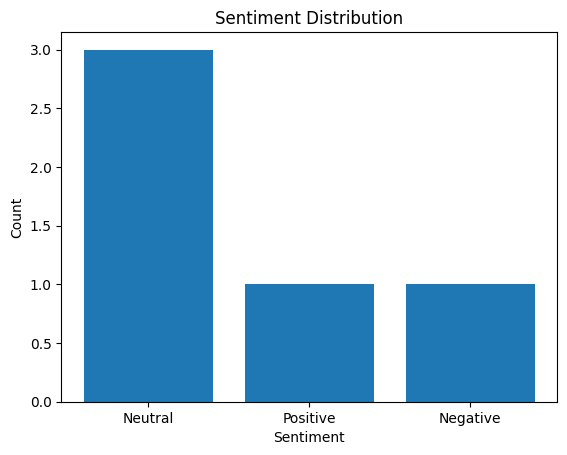

In [32]:
# Step 6: Visualize Results (Using matplotlib)

import matplotlib.pyplot as plt

# Count sentiment distribution 
sentiment_counts = df['predicted_sentiment'].value_counts()

# Basic bar plot 
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [33]:
## Step 7: Enhance with TextBlob (More Advanced but Easy to Use)

## Now we'll introduce a simple NLP library:

# First install TextBlob

# In terminal: pip install textblob

# Then download required NLTK data: python -m textblob.download_corpora

from textblob import TextBlob

def textblob_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply to our DataFrame
df['textblob_sentiment'] = df['text'].apply(textblob_sentiment)
print("\nWith TextBlob Analysis:")
print(df)

# Compare methods
textblob_accuracy = (df['expected_sentiment'] == df['textblob_sentiment'].str.lower()).mean()
print(f"\nTextBlob Accuracy: {textblob_accuracy: .2%}")



With TextBlob Analysis:
                    text expected_sentiment predicted_sentiment  \
0   I love this product!           positive            Positive   
1      This is terrible.           negative             Neutral   
2  It's okay, not great.            neutral             Neutral   
3  Absolutely fantastic!           positive             Neutral   
4        I hate Mondays.           negative            Negative   

  textblob_sentiment  
0           Positive  
1           Negative  
2           Positive  
3           Positive  
4           Negative  

TextBlob Accuracy:  80.00%


In [34]:
# Step 8: Save and Load Your Model (Basic File I/O)

import pickle

# Save our DataFrame to a CSV file (basic file operation)
df.to_csv('/home/bipinhyoju/Downloads/csv files/sentiment_results.csv', index= False)
print("Results saved to sentiment_results.csv")

# Save our simple sentiment function to a pickle file
with open('simple_sentiment_model.pk1', 'wb') as f:
    pickle.dump(simple_sentiment_analysis, f)
print("Model saved to simple_sentiment_model.pk1")

# Later you can load it with:
# with open('simple_sentiment_model.pk1', 'rb') as f:
#   loaded_model = pickle.load(f)

Results saved to sentiment_results.csv
Model saved to simple_sentiment_model.pk1


In [35]:
# Step 9: Create a Simple Command-Line Interface

def main():
    """Simple command-line sentiment analyzer"""
    print("Simple Sentiment Analyzer")
    print("Type 'quit' to exit\n")
    
    while True:
        user_input = input("Enter some text for sentiment analysis: ")
        if user_input.lower() == 'quit':
            break
        
        # Use our simple function
        simple_result = simple_sentiment_analysis(user_input)
        
        # Use TextBlob
        blob_result = textblob_sentiment(user_input)
        
        print(f"\nSimple Analysis Result: {simple_result}")
        print(f"TextBlob Analysis Result: {blob_result}\n")

if __name__ == "__main__":
    main()

Simple Sentiment Analyzer
Type 'quit' to exit


Simple Analysis Result: Positive
TextBlob Analysis Result: Positive


Simple Analysis Result: Positive
TextBlob Analysis Result: Positive


Simple Analysis Result: Neutral
TextBlob Analysis Result: Neutral


Simple Analysis Result: Neutral
TextBlob Analysis Result: Neutral


Simple Analysis Result: Neutral
TextBlob Analysis Result: Neutral


Simple Analysis Result: Neutral
TextBlob Analysis Result: Neutral


Simple Analysis Result: Positive
TextBlob Analysis Result: Neutral


Simple Analysis Result: Neutral
TextBlob Analysis Result: Positive


Simple Analysis Result: Neutral
TextBlob Analysis Result: Negative


Simple Analysis Result: Neutral
TextBlob Analysis Result: Neutral


Simple Analysis Result: Neutral
TextBlob Analysis Result: Negative


Simple Analysis Result: Neutral
TextBlob Analysis Result: Neutral


Simple Analysis Result: Neutral
TextBlob Analysis Result: Neutral


Simple Analysis Result: Neutral
TextBlob Analysis Result: Po